In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import fbeta_score, make_scorer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Reading train and test csv
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

# Data Processing

In [3]:
df1.head()

,A,B,C,D,E,F,G,H,Target
0,5,122,86,NaN,NaN,34.7,0.290,33,0
1,2,175,88,NaN,NaN,22.9,0.326,22,0
2,4,129,86,2.0,27.0,35.1,0.231,23,0
3,12,92,62,7.0,258.0,27.6,0.926,44,1
4,3,102,44,2.0,94.0,3.8,0.400,26,0


In [4]:
df1.describe()

,A,B,C,D,E,F,G,H,Target
count,500.000000,500.000000,500.000000,360.000000,253.000000,492.000000,500.000000,500.000000,500.000000
mean,3.876000,121.470000,68.666000,26.308333,106.332016,29.932724,0.472286,33.270000,0.324000
std,3.394653,32.738735,20.288067,13.120056,122.448436,10.624439,0.341394,11.890663,0.468469
min,0.000000,0.000000,0.000000,1.000000,1.000000,2.100000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,18.000000,21.000000,25.375000,0.240000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,27.000000,67.000000,32.000000,0.378000,29.000000,0.000000
75%,6.000000,143.000000,80.000000,35.000000,145.000000,36.025000,0.612250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,59.400000,2.420000,72.000000,1.000000


In [5]:
df2.head()

,A,B,C,D,E,F,G,H
0,6,148,72,35.0,NaN,33.6,0.627,50
1,1,85,66,29.0,NaN,26.6,0.351,31
2,5,116,74,NaN,NaN,25.6,0.201,30
3,4,110,92,NaN,NaN,37.6,0.191,30
4,5,166,72,19.0,175.0,25.8,0.587,51


In [6]:
df2.describe()

,A,B,C,D,E,F,G,H
count,268.000000,268.000000,268.000000,181.000000,141.000000,265.000000,268.000000,268.000000
mean,3.787313,119.820896,69.925373,25.016575,104.453901,29.741132,0.471112,33.186567
std,3.327829,30.522872,17.491197,12.651515,106.517234,10.818601,0.312305,11.534782
min,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.084000,21.000000
25%,1.000000,100.000000,64.000000,16.000000,19.000000,25.500000,0.251250,24.000000
50%,3.000000,119.000000,72.000000,26.000000,72.000000,31.600000,0.361500,29.500000
75%,6.000000,137.250000,78.000000,35.000000,168.000000,36.100000,0.643500,39.250000
max,15.000000,196.000000,110.000000,52.000000,545.000000,67.100000,1.893000,81.000000


In [7]:
df1.isnull().sum()

A           0
B           0
C           0
D         140
E         247
F           8
G           0
H           0
Target      0
dtype: int64

In [8]:
df2.isnull().sum()

A      0
B      0
C      0
D     87
E    127
F      3
G      0
H      0
dtype: int64

In [9]:
df1['D'] = df1['D'].fillna((df1['D'].mean()))
df1['E'] = df1['E'].fillna((df1['E'].mean()))
df1['F'] = df1['F'].fillna((df1['F'].mean()))

In [10]:
df2['D'] = df2['D'].fillna((df2['D'].mean()))
df2['E'] = df2['E'].fillna((df2['E'].mean()))
df2['F'] = df2['F'].fillna((df2['F'].mean()))

In [11]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
A         500 non-null int64
B         500 non-null int64
C         500 non-null int64
D         500 non-null float64
E         500 non-null float64
F         500 non-null float64
G         500 non-null float64
H         500 non-null int64
Target    500 non-null int64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 8 columns):
A    268 non-null int64
B    268 non-null int64
C    268 non-null int64
D    268 non-null float64
E    268 non-null float64
F    268 non-null float64
G    268 non-null float64
H    268 non-null int64
dtypes: float64(4), int64(4)
memory usage: 16.9 KB


In [31]:
df1.shape

(500, 9)

In [32]:
df2.shape

(268, 8)

In [12]:
y= df1['Target']
X= df1[['A','B','C','D','E','F','G','H']]

In [13]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
test_scale = scaler.transform(df2)

# SVM

In [14]:
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.78
Accuracy on test set: 0.71


In [15]:
svc = SVC(C=10,gamma=0.01,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.805
Accuracy on test set: 0.760


In [16]:
targetcount10 = svc.predict(test_scale)
print(targetcount10)

[1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0]


# Logistic Regression

In [17]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'liblinear')
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

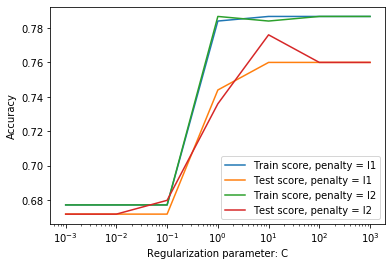

In [18]:
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [19]:
#Accuracy for different values of for C= 1
log = LogisticRegression(C=1,solver='liblinear').fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(log.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(log.score(X_test, y_test)))

Training set accuracy: 0.787
Test set accuracy: 0.736


In [20]:
targetcount = log.predict(test_scale)
print(targetcount)

[1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0]


# KNN Classifier

In [21]:
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

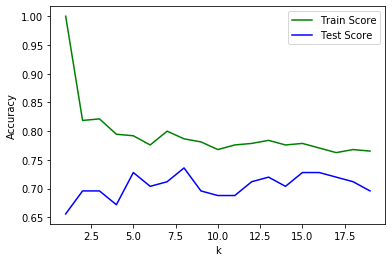

In [22]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [23]:
knn = KNeighborsClassifier(8)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.7867
Test score: 0.7360


In [24]:
targetcount = knn.predict(test_scale)
print(targetcount)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 1 0 1 1 0 0 0]


# Decision Tree

In [25]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.672


In [26]:
#max_depth =4
tree1 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, y_test)))

Accuracy on training set: 0.832
Accuracy on test set: 0.712


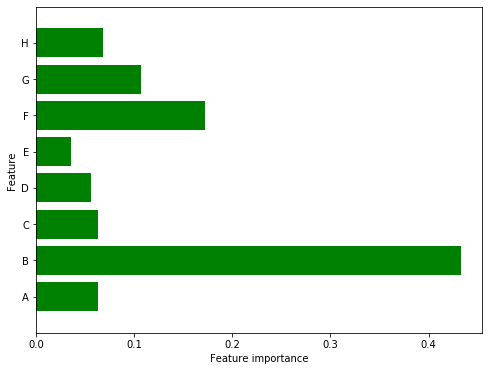

In [27]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center',color = "green")
    plt.yticks(np.arange(n_features), df1)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

In [28]:
count_dt = tree1.predict(df2)
print(count_dt)

[1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0]


In [29]:
# I chosed to use SVM model since it had the highest accuracy
prediction = df2.copy() 
prediction['Target'] = targetcount10
prediction

,A,B,C,D,E,F,G,H,Target
0,6,148,72,35.000000,104.453901,33.6,0.627,50,1
1,1,85,66,29.000000,104.453901,26.6,0.351,31,0
2,5,116,74,25.016575,104.453901,25.6,0.201,30,0
3,4,110,92,25.016575,104.453901,37.6,0.191,30,0
4,5,166,72,19.000000,175.000000,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
263,1,128,88,39.000000,11.000000,36.5,1.057,37,0
264,0,123,72,25.016575,104.453901,36.3,0.258,52,0
265,2,122,70,27.000000,104.453901,36.8,0.340,27,0
266,5,121,72,23.000000,112.000000,26.2,0.245,30,0


In [30]:
prediction.to_csv('test_final_predicted.csv')